In [211]:
import cv2
import numpy as np
import pandas as pd
import random
import matplotlib.colors as mcolors
import sys
from IPython.display import Image, display

In [212]:
aruco = cv2.aruco
dictionary = aruco.getPredefinedDictionary(aruco.DICT_4X4_50)

In [213]:
def imshow (img):
    imgInline = cv2.imencode('.jpg', img)[1]
    display(Image(imgInline))

In [214]:
cap = cv2.VideoCapture("src/mov/VibrationTest/t_hd_60.mp4")

if not (cap.isOpened()) :   # 正常に読み込めなかった場合終了する（VideoCaptureコンストラクタ自体は失敗してもFalseを返さないので注意）
    sys.exit()
fps = int(cap.get(cv2.CAP_PROP_FPS))
print("FPS: " + str(fps))
frameCount = 1
ret, img = cap.read()
h, w = img.shape[:2]

want_frame = 293
cap.set(cv2.CAP_PROP_POS_FRAMES, want_frame)
ret, img = cap.read()
if not ret: sys.exit()

FPS: 29


In [215]:
# 実験対象のフレームを画像に保存
# frame_want = np.arange(197, 199)
# for frame in frame_want:
#     cap.set(cv2.CAP_PROP_POS_FRAMES, frame)
#     ret, img = cap.read()
#     cv2.imwrite("./output/noisy_frames/test02_" + str(frame) + ".jpg", img)

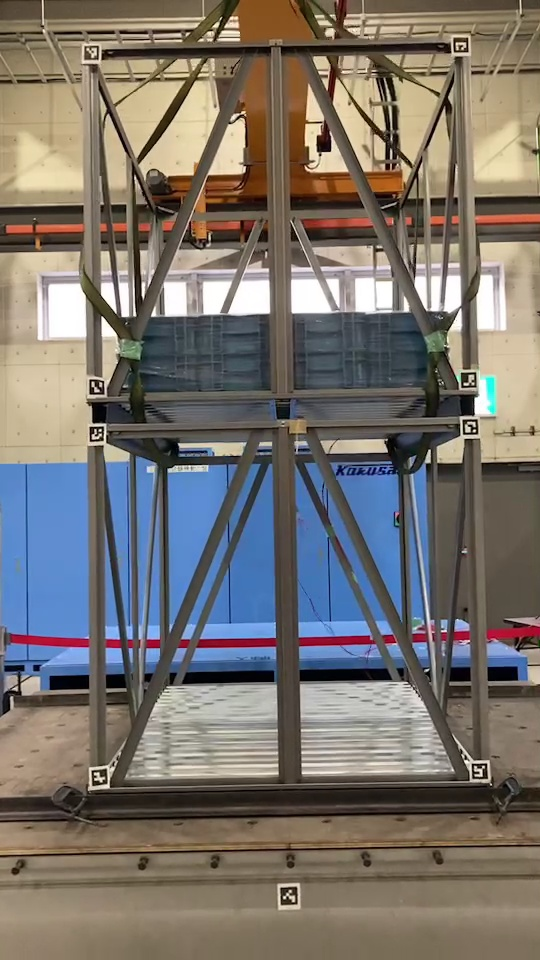

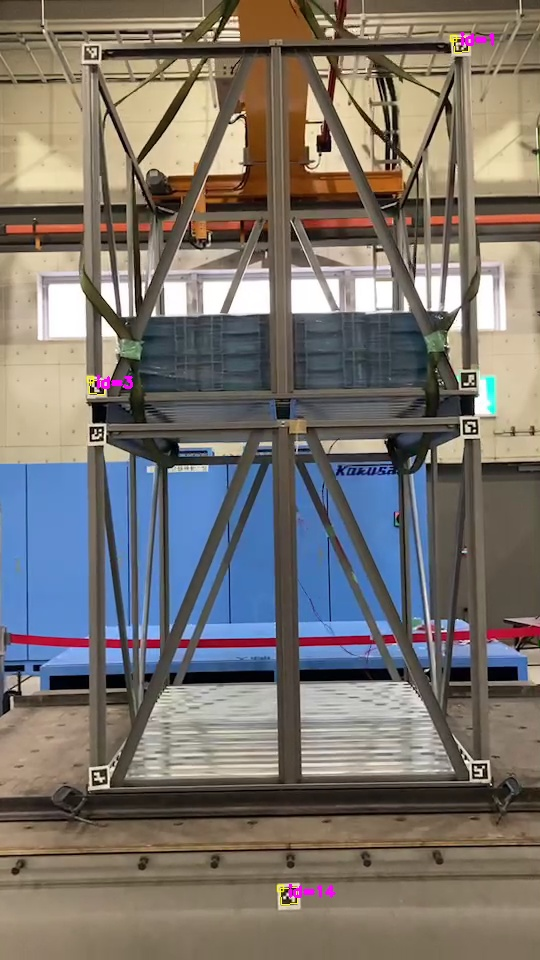

In [216]:
img_draw = img.copy()
imshow(img_draw)
corners_o, ids_o, rejectedImgPoints_o = aruco.detectMarkers(img_draw, dictionary)
aruco.drawDetectedMarkers(img_draw, corners_o, ids_o, (0, 255, 255))
imshow(img_draw)

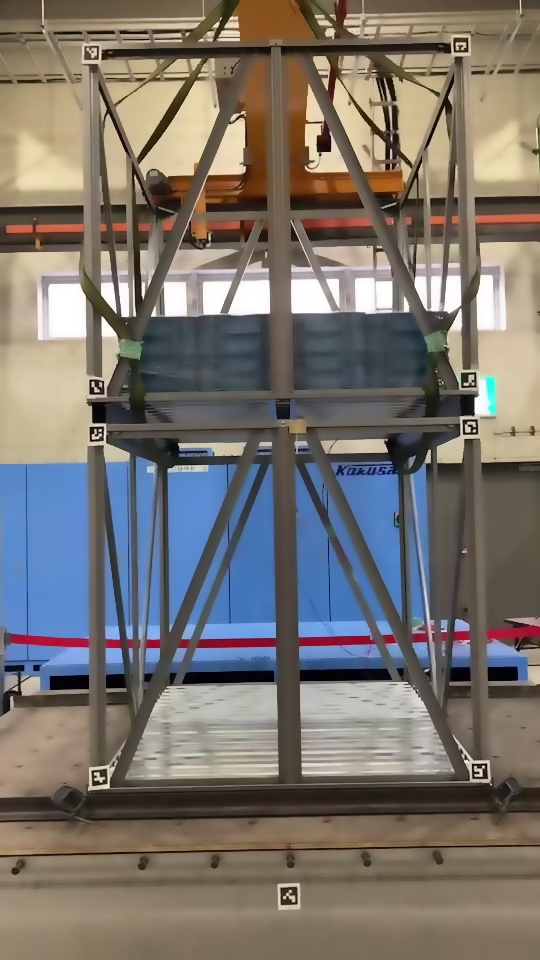

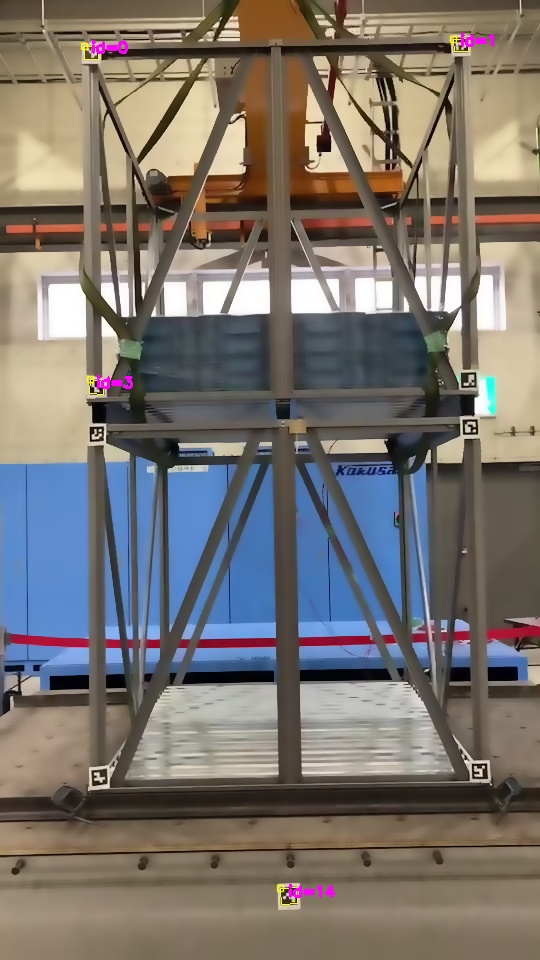

In [217]:
# img = cv2.imread("./output/noisy_frames/test02_199.jpg")

def make_sharp_kernel(k: int):
  return np.array([
    [-k / 9, -k / 9, -k / 9],
    [-k / 9, 1 + 8 * k / 9, k / 9],
    [-k / 9, -k / 9, -k / 9]
  ], np.float32)

kernel = make_sharp_kernel(2)
img_ga = cv2.GaussianBlur(img, (9, 9), 1)   # フィルターサイズは必ず奇数を与える
img_bltrl = cv2.bilateralFilter(img, d=10, sigmaColor=75, sigmaSpace=75)

img_draw = img_bltrl.copy()
corners, ids, rejectedImgPoints = aruco.detectMarkers(img_draw, dictionary)

imshow(img_draw)
aruco.drawDetectedMarkers(img_draw, corners, ids, (0, 255, 255))
imshow(img_draw)

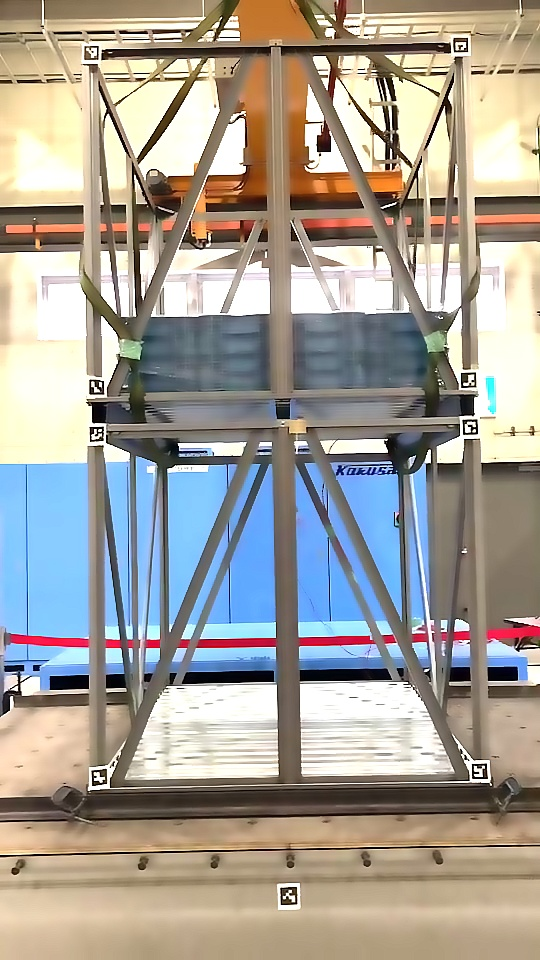

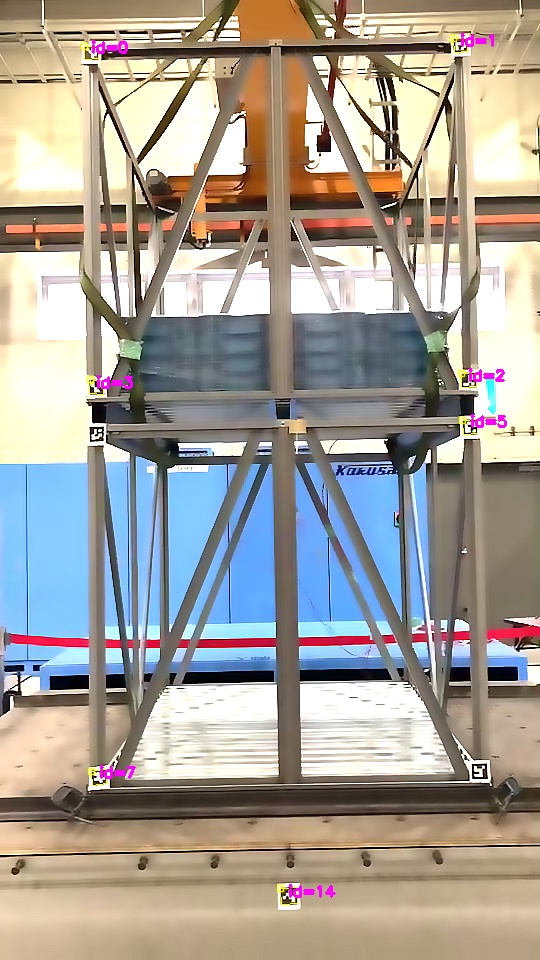

In [218]:

img_sp = cv2.filter2D(img_bltrl, -1, kernel).astype("uint8")

img_for_detect = img_sp.copy()
imshow(img_for_detect)
corners_f, ids_f, rejectedImgPoints_f = aruco.detectMarkers(img_for_detect, dictionary)
aruco.drawDetectedMarkers(img_for_detect, corners_f, ids_f, (0, 255, 255))
imshow(img_for_detect)

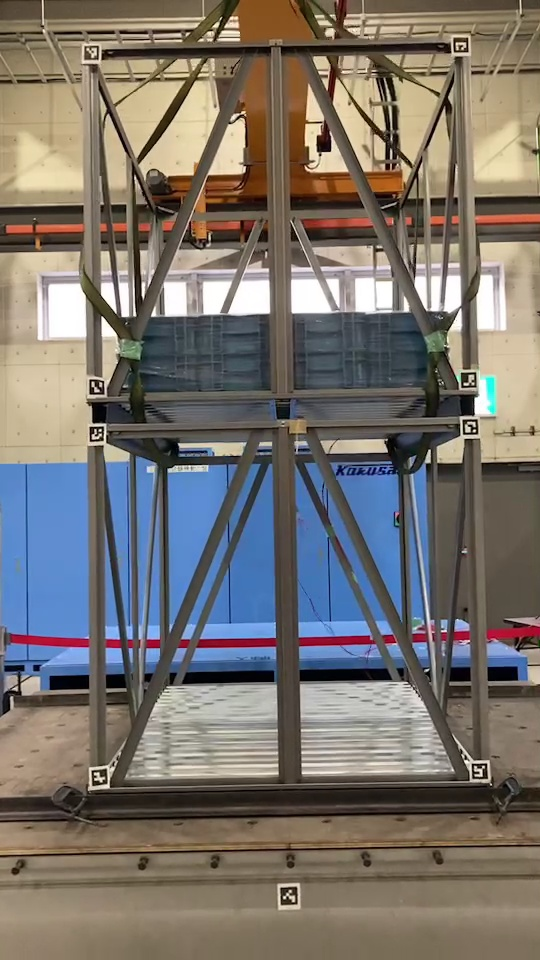

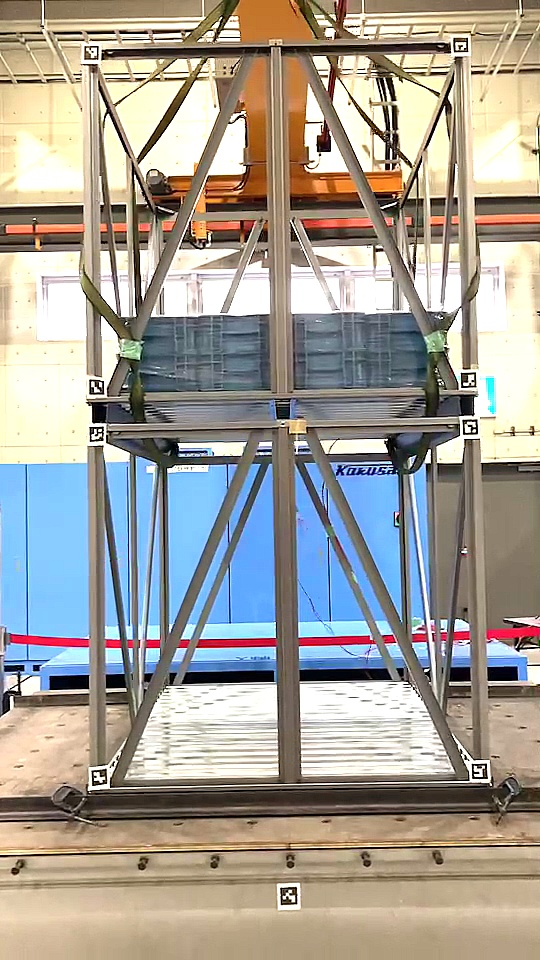

In [237]:
img_me = cv2.medianBlur(img, 1)
imshow(img_me)
img_sp = cv2.filter2D(img_me, -1, kernel).astype("uint8")
imshow(img_sp)

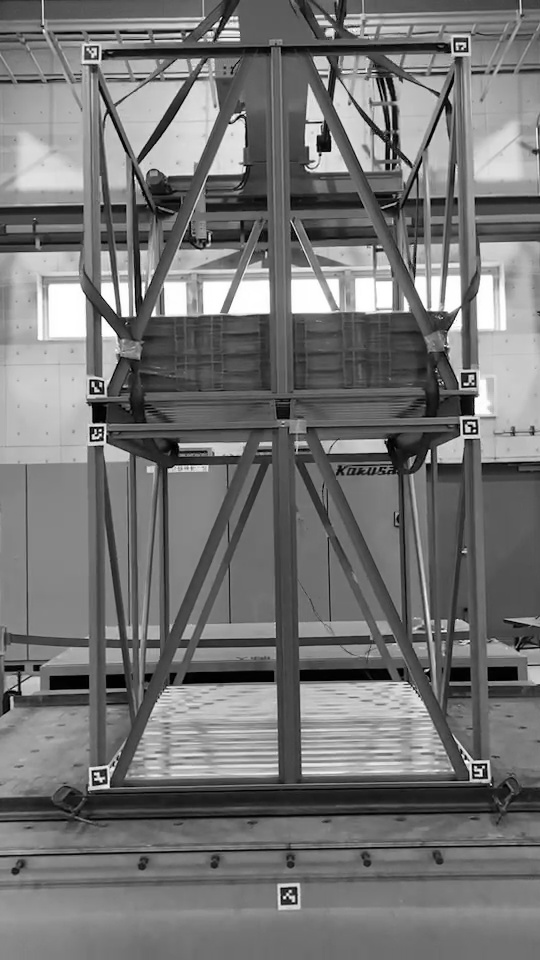

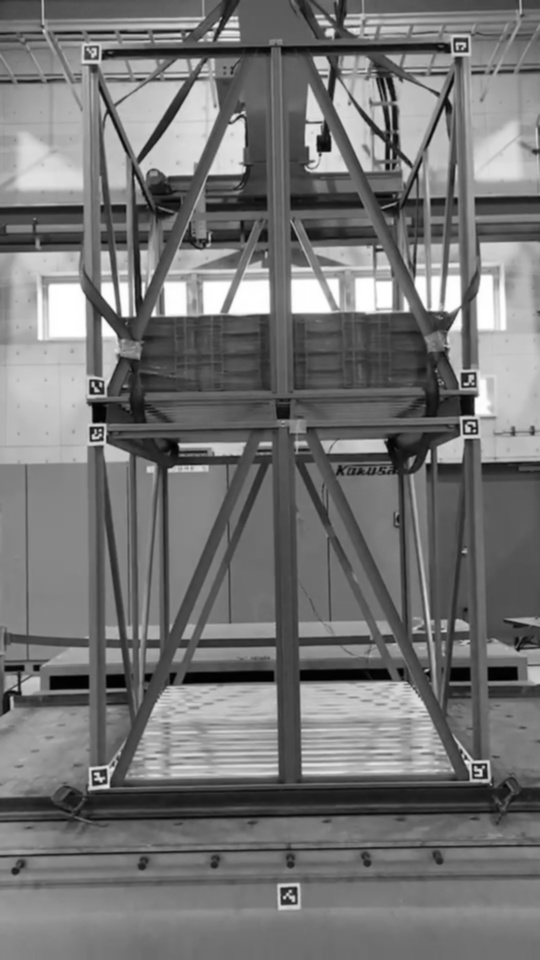

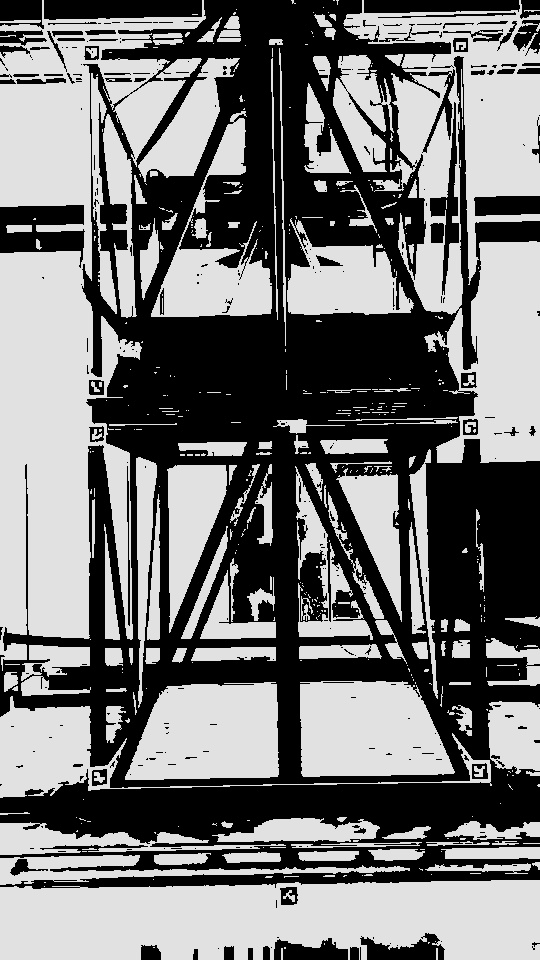

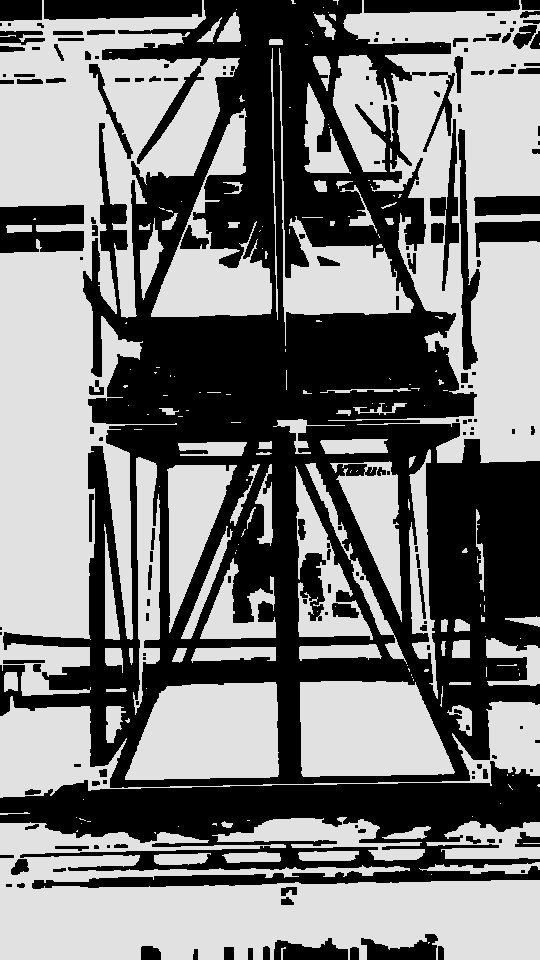

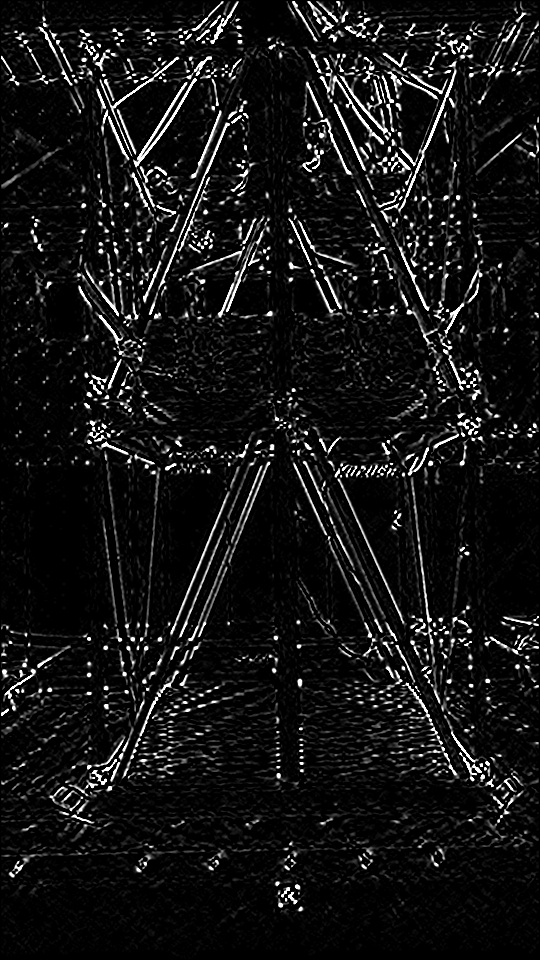

In [231]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(img_gray)
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
imshow(img_blur)
ret, img_th = cv2.threshold(img_gray, 110, 225, cv2.THRESH_BINARY)
imshow(img_th)

kernel_mor = np.ones((3,3), dtype=np.uint8)
img_mor = cv2.morphologyEx(img_th, cv2.MORPH_CLOSE, kernel_mor)
imshow(img_mor)
img_sobel = cv2.Sobel(img_blur, ddepth=cv2.CV_32F, dx=1, dy=1, ksize=5)
imshow(img_sobel)